# import modules..

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# helper functions (if needed)

In [2]:
# python code...    

# read in training data

In [3]:
trainData = pd.read_csv("train.csv", delimiter = ",")

# analyze and visualize training data 

non na values
 car             323
cylinders       325
displacement    325
horsepower      320
weight          325
acceleration    325
model           325
origin          325
mpg             317
dtype: int64


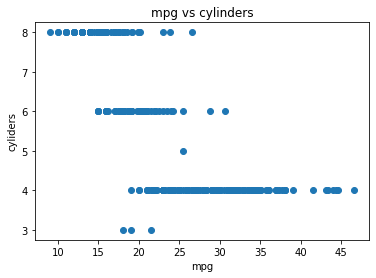

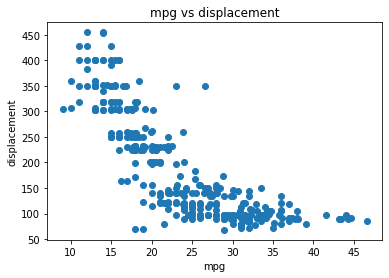

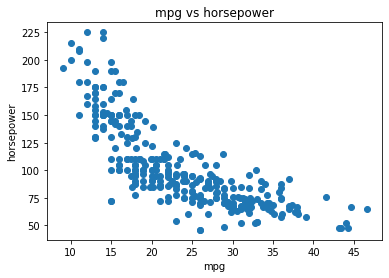

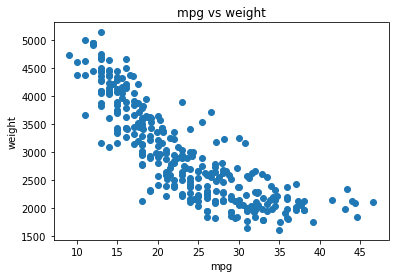

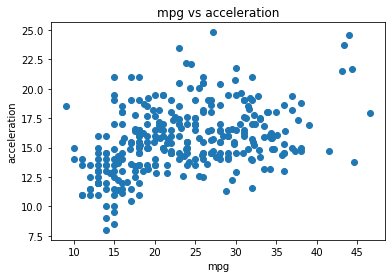

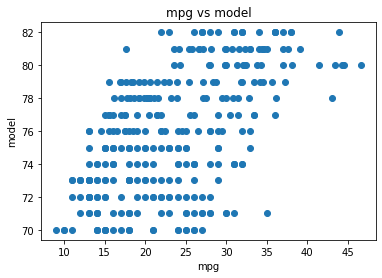

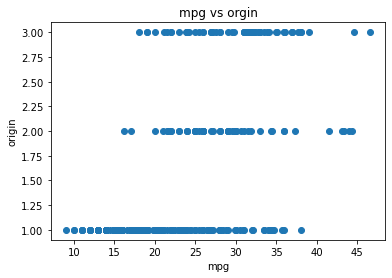

average cylinder: 5.489230769230769
average displacement: 195.57384615384615
average horsepower: 104.659375
average weight: 2980.369230769231
average acceleration: 15.5633846153846
average model: 75.70461538461538
average origin: 1.5907692307692307


In [4]:
print("non na values\n", trainData.count())
cylinder = trainData['cylinders']
dis = trainData['displacement']
horse = trainData['horsepower']
w = trainData['weight']
a = trainData['acceleration']
m = trainData['model']
o = trainData['origin']
mpg = trainData['mpg']

plt.scatter(mpg, cylinder)
plt.xlabel("mpg")
plt.ylabel("cyliders")
plt.title("mpg vs cylinders")
plt.show()

plt.scatter(mpg, dis)
plt.xlabel("mpg")
plt.ylabel("displacement")
plt.title("mpg vs displacement")
plt.show()

plt.scatter(mpg, horse)
plt.xlabel("mpg")
plt.ylabel("horsepower")
plt.title("mpg vs horsepower")
plt.show()

plt.scatter(mpg, w)
plt.xlabel("mpg")
plt.ylabel("weight")
plt.title("mpg vs weight")
plt.show()

plt.scatter(mpg, a)
plt.xlabel("mpg")
plt.ylabel("acceleration")
plt.title("mpg vs acceleration")
plt.show()

plt.scatter(mpg, m)
plt.xlabel("mpg")
plt.ylabel("model")
plt.title("mpg vs model")
plt.show()

plt.scatter(mpg, o)
plt.xlabel("mpg")
plt.ylabel("origin")
plt.title("mpg vs orgin")
plt.show()

print("average cylinder: " + str(np.mean(cylinder)))
print("average displacement: " + str(np.mean(dis)))
print("average horsepower: " + str(np.mean(horse)))
print("average weight: " + str(np.mean(w)))
print("average acceleration: " + str(np.mean(a)))
print("average model: " + str(np.mean(m)))
print("average origin: " + str(np.mean(o)))

# experiment with building models to predict training data mpg

R^2 = 0.6182746408985158


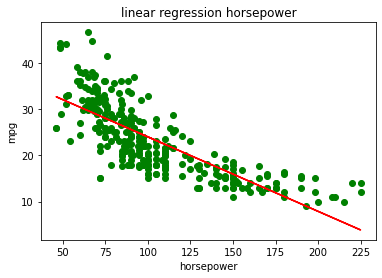

R^2 = 0.16973386659842243


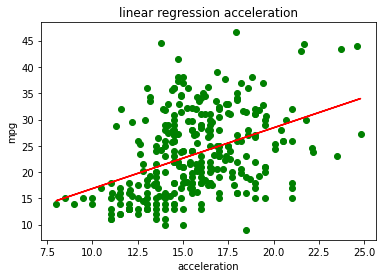

R^2 = 0.697208919955927


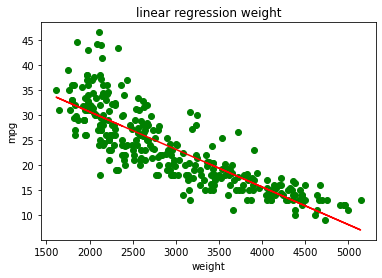

R^2 drop car:  0.8192068434693418
mean squared error drop car:  11.055853118447292
R^2 drop car and origin:  0.8074383666739979
mean squared error drop car and origin:  11.775518361169652
R^2 drop origin,car,clinders:  0.8084294880288683
mean squared error drop origin,car,clinders:  11.714909362840972
R^2 drop car and normalize:  0.8192068434693425
mean squared error drop car and normalize:  11.05585311844725
R^2 weight,horsepower,acceleration,displacement:  0.7082078072037716
mean squared error: weight,horsepower,acceleration,displacement 17.843660050914043


stats on the best R^2 I found
mean pred 23.316781066335416
mean original 23.329354838709683
std pred 7.129754938513562
std original 7.819970891573524
max pred 36.32252094644355
max original 46.6
min pred 6.037020993054647
min original 9.0


In [5]:
trainData = trainData.dropna()
X = trainData.drop(['mpg'], axis = 1)
X = X.drop(['car'], axis =1)

X=X['horsepower']
y=trainData['mpg']
m, b, r, _, _ = stats.linregress(X,y)
print("R^2 =", r**2)


yp = m * X + b
plt.plot(X,y, 'go')
plt.plot(X,yp, color='red')
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("linear regression horsepower")
plt.show()

X6 = trainData.drop(['mpg'], axis = 1)
X6 = X6.drop(['car'], axis =1)


X6=X6['acceleration']
y=trainData['mpg']
m, b, r, _, _ = stats.linregress(X6,y)
print("R^2 =", r**2)


yp = m * X6 + b
plt.plot(X6,y, 'go')
plt.plot(X6,yp, color='red')
plt.xlabel("acceleration")
plt.ylabel("mpg")
plt.title("linear regression acceleration")
plt.show()

X6 = trainData.drop(['mpg'], axis = 1)
X6 = X6.drop(['car'], axis =1)

X6=X6['weight']
y=trainData['mpg']
m, b, r, _, _ = stats.linregress(X6,y)
print("R^2 =", r**2)


yp = m * X6 + b
plt.plot(X6,y, 'go')
plt.plot(X6,yp, color='red')
plt.xlabel("weight")
plt.ylabel("mpg")
plt.title("linear regression weight")
plt.show()




X2 = trainData.drop(['mpg'], axis = 1)
X2 = X2.drop(['car'], axis =1)

regress = LinearRegression()
regress.fit(X2,y)
pred = cross_val_predict(regress, X2, y, cv=5)
r2 = r2_score(y, pred)
print("R^2 drop car: ", r2)
mse = mean_squared_error(y, pred)
print("mean squared error drop car: ", mse)

X3 = trainData.drop(['mpg'], axis = 1)
X3 = X3.drop(['car'], axis =1)
X3 = X3.drop(['origin'], axis = 1)

regress = LinearRegression()
regress.fit(X3,y)

pred3 = cross_val_predict(regress, X3, y, cv=5)
r2 = r2_score(y, pred3)
print("R^2 drop car and origin: ", r2)
mse = mean_squared_error(y, pred3)
print("mean squared error drop car and origin: ", mse)

X4 = trainData.drop(['mpg'], axis = 1)
X4 = X4.drop(['car'], axis =1)
X4 = X4.drop(['cylinders'], axis = 1)
X4 = X4.drop(['origin'], axis = 1)

regress = LinearRegression()
regress.fit(X4,y)

pred2 = cross_val_predict(regress, X4, y, cv=5)
r2 = r2_score(y, pred2)
print("R^2 drop origin,car,clinders: ", r2)
mse = mean_squared_error(y, pred2)
print("mean squared error drop origin,car,clinders: ", mse)


X5 = trainData.drop(['mpg'], axis = 1)
X5 = X5.drop(['car'], axis =1)

regress2 = LinearRegression(normalize=True)
regress2.fit(X5,y)
pred4 = cross_val_predict(regress2, X5, y, cv=5)
r2 = r2_score(y, pred4)
print("R^2 drop car and normalize: ", r2)
mse = mean_squared_error(y, pred4)
print("mean squared error drop car and normalize: ", mse)



X7 = trainData.drop(['mpg'], axis = 1)
X7 = X7.drop(['car'], axis =1)

X7 = X7[['weight','horsepower', 'acceleration', 'displacement']]
regress2 = LinearRegression(normalize=True)
regress2.fit(X7,y)
pred5 = cross_val_predict(regress2, X7, y, cv=5)
r2 = r2_score(y, pred5)
print("R^2 weight,horsepower,acceleration,displacement: ", r2)
mse = mean_squared_error(y, pred5)
print("mean squared error: weight,horsepower,acceleration,displacement", mse)

print("\n")
print("stats on the best R^2 I found")
X2 = trainData.drop(['mpg'], axis = 1)
X2 = X2.drop(['car'], axis =1)

regress = LinearRegression()
regress.fit(X2,y)
predMPG = cross_val_predict(regress, X2, y, cv=5)
print("mean pred", np.mean(predMPG))
print("mean original", np.mean(trainData['mpg']))
print("std pred", np.std(predMPG))
print("std original", np.std(trainData['mpg']))
print("max pred", np.max(predMPG))
print("max original", np.max(trainData['mpg']))
print("min pred", np.min(predMPG))
print("min original", np.min(trainData['mpg']))

# Question: What features and model parameters worked "best"?  Why?

The features that I found that worked best togther were cylinder, displacment, horsepower, weight, acceleration, model, and origin. In this one I dropped car mostly becuase changing this to categorical might loose some data and I didn't personally think this was a good determining thing for mpg. 
The base paramters seem to work the best in my trials. 
These work the best because it got the highest R^2 value and the lowest mean squared error. I also ran some statistics on this model and you can see that the mean and standard deiation are pretty similar. The max and min show where some of the data doesn't fit as well, but the mean and standard deviation being similar is a good thing for a model.

# train "fresh" mpg prediction model on training data

In [6]:
Xfinal = trainData.drop(['mpg'], axis = 1)
Xfinal = Xfinal.drop(['car'], axis =1)

Fregress = LinearRegression()
Fregress.fit(Xfinal,y)

LinearRegression()

# read in test data

In [7]:
testData = pd.read_csv("test.csv")

# use trained model to predict mpg of test data

In [8]:
testData = testData.dropna()
altTest = testData.drop(['car'], axis = 1)

mpg = Fregress.predict(altTest)

testData['mpg'] = mpg

# write test data with predicted mpg to \<YourLastName>.csv

In [9]:
testData.to_csv('Cumro.csv', index=False, sep='\t')